In [7]:
import numpy as np
import tensorflow as tf
import keras as tfk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Carga del modelo .keras
model_path = "weights.keras"  # Cambia esto con la ruta de tu archivo .keras
model = tfk.models.load_model(model_path)

# Carga de los datos de prueba desde un archivo .npz
data = np.load("clean_dataset.npz")  # Cambia esto con la ruta a tu archivo .npz
X_test = data['images']  # Cambia 'X_test' al nombre correcto dentro del archivo .npz
y_test = data['labels']  # Cambia 'y_test' al nombre correcto dentro del archivo .npz

X_test = preprocess_input(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..1.0].


Predicted class: Class 1 (Class 1)
Real class: Class 1 (Class 1)
The prediction matches the real class!


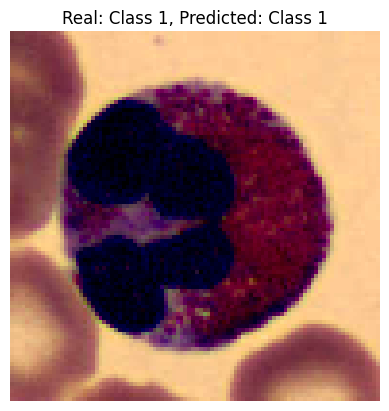

In [17]:
 #Etiquetas de las clases (modifica según tu problema)
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

# Selecciona una muestra específica (puedes cambiar el índice)
sample_index = random_index = np.random.randint(len(X_test))
sample = X_test[sample_index]
real_class = y_test[sample_index]  # Clase real

# Realiza la predicción para la muestra
sample_prediction = model.predict(sample[np.newaxis, ...], verbose=0)  # Añade una dimensión para el batch
predicted_class = np.argmax(sample_prediction)

# Muestra la predicción y la clase real
print(f"Predicted class: {class_labels[predicted_class]} (Class {predicted_class})")
print(f"Real class: {class_labels[real_class]} (Class {real_class})")

# Comparación entre la predicción y la clase real
if predicted_class == real_class:
    print("The prediction matches the real class!")
else:
    print("The prediction does NOT match the real class.")

# Visualiza la muestra
plt.imshow(sample.squeeze(), cmap='gray')  # Ajusta el cmap según sea necesario (por ejemplo, 'gray' o 'viridis')
plt.title(f"Real: {class_labels[real_class]}, Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()

Total samples: 11959
Correct predictions: 2181
Accuracy: 18.24%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       852
     Class 1       0.18      1.00      0.31      2181
     Class 2       0.00      0.00      0.00      1085
     Class 3       0.00      0.00      0.00      2026
     Class 4       0.00      0.00      0.00       849
     Class 5       0.00      0.00      0.00       993
     Class 6       0.00      0.00      0.00      2330
     Class 7       0.00      0.00      0.00      1643

    accuracy                           0.18     11959
   macro avg       0.02      0.12      0.04     11959
weighted avg       0.03      0.18      0.06     11959


Confusion Matrix:
[[   0  852    0    0    0    0    0    0]
 [   0 2181    0    0    0    0    0    0]
 [   0 1085    0    0    0    0    0    0]
 [   0 2026    0    0    0    0    0    0]
 [   0  849    0    0    0    0    0    0]
 [   0  993    0    0    0 

/home/ruiz/cuda/cuda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruiz/cuda/cuda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruiz/cuda/cuda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


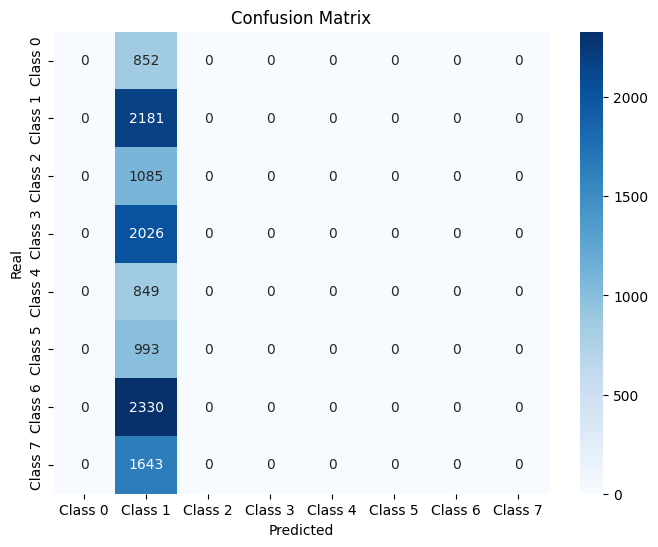

In [6]:
# Inicializa contadores para calcular métricas
correct_predictions = 0
total_samples = len(X_test)

# Almacena los resultados para analizar posteriormente si es necesario
predictions = []
real_classes = []

# Itera sobre todas las muestras en el conjunto de prueba
for i in range(total_samples):
    sample = X_test[i]
    real_class = y_test[i]

    # Realiza la predicción para cada muestra
    sample_prediction = model.predict(sample[np.newaxis, ...], verbose=0)  # Añade una dimensión para el batch
    predicted_class = np.argmax(sample_prediction)

    # Almacena los resultados
    predictions.append(predicted_class)
    real_classes.append(real_class)

    # Incrementa el contador si la predicción es correcta
    if predicted_class == real_class:
        correct_predictions += 1

# Calcula la precisión
accuracy = correct_predictions / total_samples * 100

# Muestra la precisión global
print(f"Total samples: {total_samples}")
print(f"Correct predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# (Opcional) Genera un reporte de clasificación o una matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(real_classes, predictions, target_names=class_labels))

# Matriz de confusión
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(real_classes, predictions)
print(conf_matrix)

# (Opcional) Visualiza la matriz de confusión
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()
